In [9]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2025, 1, 1)

In [10]:
df = yf.download("GOOGL", start, end)
df.columns = [col[0] for col in df.columns.values]

[*********************100%***********************]  1 of 1 completed


In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objs as go

In [55]:
close = df["Close"]
close

Ticker,NVDA
Date,
2020-01-02,5.972711
2020-01-03,5.877111
2020-01-06,5.901758
2020-01-07,5.973208
2020-01-08,5.984412
...,...
2024-12-24,140.220001
2024-12-26,139.929993
2024-12-27,137.009995


In [57]:
pct.std()

Ticker
NVDA    0.03394
dtype: float64

In [59]:
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600


In [61]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df

,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [62]:
df = df.rename(columns={
    'Close_NVDA': 'Close',
    'High_NVDA': 'High',
    'Low_NVDA': 'Low',
    'Open_NVDA': 'Open',
    'Volume_NVDA': 'Volume'
})
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [64]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [65]:
# Flatten the MultiIndex columns


# Rename columns for simplicity


# Ensure index is datetime


# Create the candlestick chart
fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index,  # Dates from the index
            open=df['Open'],  # Open prices
            high=df['High'],  # High prices
            low=df['Low'],    # Low prices
            close=df['Close'] # Close prices
        )
    ]
)

# Update layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the plot
fig.show()

In [3]:
pct = df.pct_change()

NameError: name 'df' is not defined

In [12]:
pct = df.pct_change()

<Axes: xlabel='Close', ylabel='Count'>

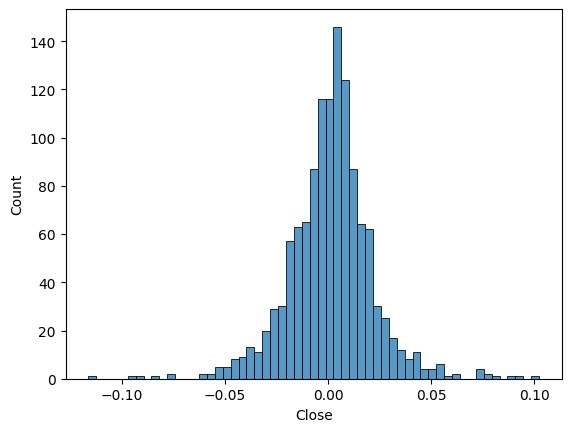

In [15]:
sns.histplot(data=pct["Close"])

In [17]:
fig = go.Figure(data=[go.Histogram(x=pct["Close"])])
fig.update_layout(
    xaxis_title='Close',
    yaxis_title='Count',
    xaxis_rangeslider_visible=False
)
fig.show()